In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

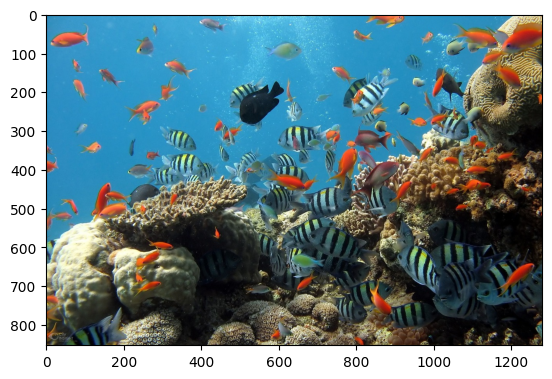

In [2]:
# Plot histogram of RGB image 
image= cv.imread('./images/coral_reef.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)

# Image Histograms

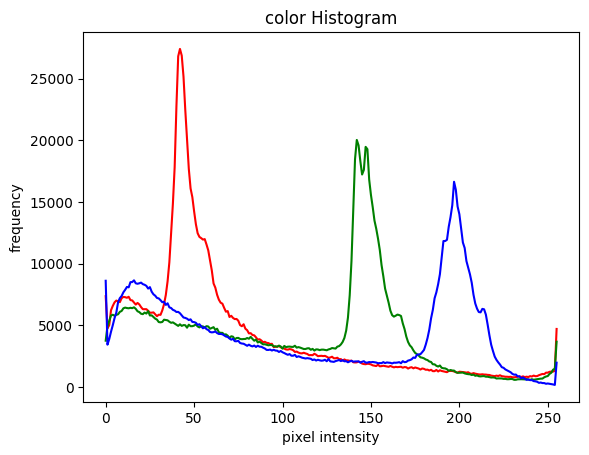

In [ ]:
# we use rgb to comute the correct histogram
# plot all the channels separately to plot histogram 
# first we split the three channels
channels = cv.split(image_rgb)

colors = ['red', 'green', 'blue']

for channel, color in zip(channels, colors):
    #Histogram calculation 
    hist = cv.calcHist([channel], # image to use is the current channel (rgb)
                       [0],       # list of channel just the current one considered, as grayscale 
                       None,      # None mask because we use all images, not masking just one region
                       [256],     # pixel intensity limit of histogram size (since pixel intensity in 0-256) 
                       [0, 256])  # range of piexl values considered
    plt.plot(hist, color=color)   # current channel color of the histogram 

plt.title("color Histogram")
plt.xlabel("pixel intensity")
plt.ylabel("frequency")

plt.show()

# As can be seen from the intensity-frequency plot
# we see the amount of pixels with a given intensity of value in rgb channel
# The image has a lot of low intensity red pixels in the 3 channels, while the blue is prominent in lighter value (background)
# Similarly we have lots of green pixels in the middle 


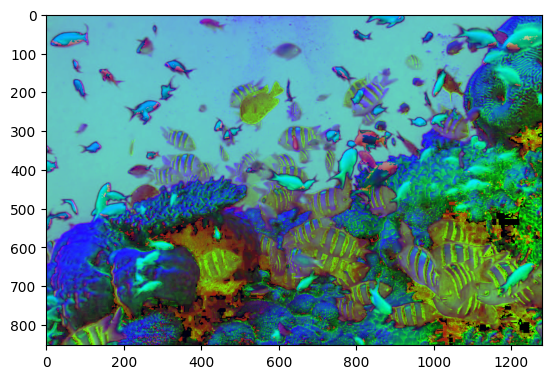

In [4]:
# To understand more about the image details it is good to move in HSV
# Infer brightness of the image not just in rgb channels...
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

plt.imshow(image_hsv)

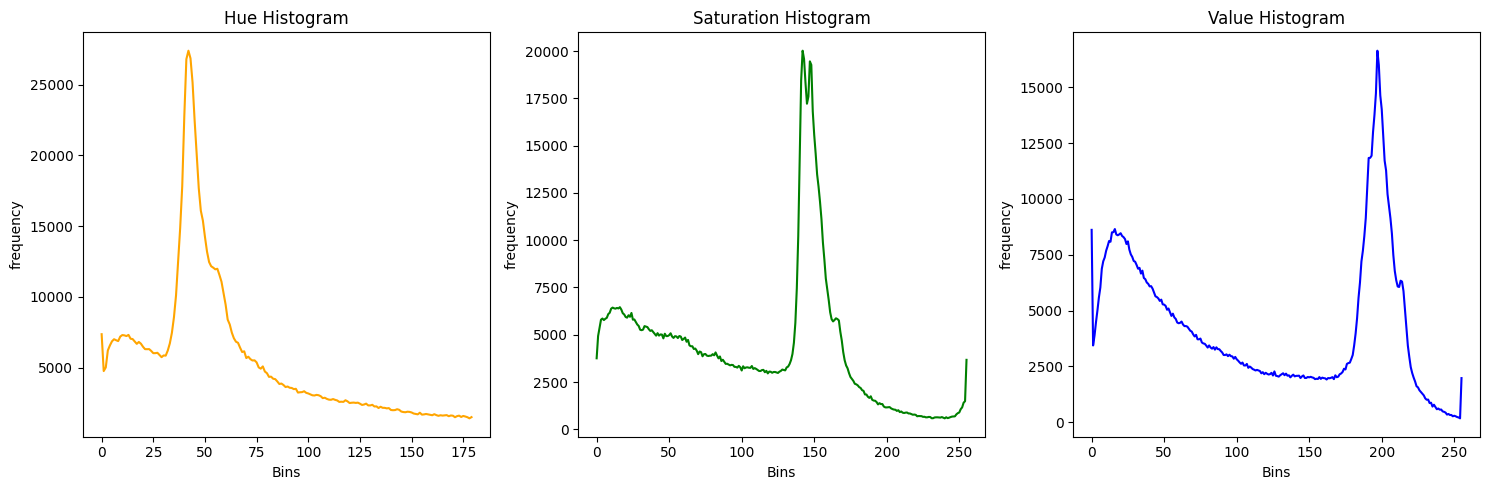

In [ ]:
# Hsv image channels division
h,s,v = cv.split(image_rgb)

#Histogram calculation 
h_hist = cv.calcHist([h],      # image to use is the current channel 
                    [0],       # list of channel just the current one considered, as grayscale 
                    None,      # None mask because we use all images, not masking just one region
                    [180],     # pixel intensity limit of histogram size 
                    [0, 180])  # range of piexl values considered

s_hist = cv.calcHist([s],      # image to use is the current channel 
                    [0],       # list of channel just the current one considered, as grayscale 
                    None,      # None mask because we use all images, not masking just one region
                    [256],     # pixel intensity limit of histogram size 
                    [0, 256])  # range of piexl values considered

v_hist = cv.calcHist([v],      # image to use is the current channel 
                    [0],       # list of channel just the current one considered, as grayscale 
                    None,      # None mask because we use all images, not masking just one region
                    [256],     # pixel intensity limit of histogram size 
                    [0, 256])  # range of piexl values considered

fig, axes = plt.subplots(1,3,figsize=(15,5))

axes[0].plot(h_hist, color='Orange')   
axes[0].set_title("Hue Histogram")
axes[0].set_xlabel("Bins")
axes[0].set_ylabel("frequency")

axes[1].plot(s_hist, color='Green')   
axes[1].set_title("Saturation Histogram")
axes[1].set_xlabel("Bins")
axes[1].set_ylabel("frequency")

axes[2].plot(v_hist, color='Blue')   
axes[2].set_title("Value Histogram")
axes[2].set_xlabel("Bins")
axes[2].set_ylabel("frequency")

plt.tight_layout()
plt.show()

# From HSV Histograms you se other details of the image
# As we can see from the Hue values disk, many values at 50 deg means lot of red/orange
# while with lot 150 saturation, means many pixels has 150 saturation values, not too much saturated image 
# while with the value to 200 means again very bright image since many pixels with high value 

# This HSV histogram show us that it is not very bright since we have many pixels also in low values, but equalized in low/high 
# 

# Histogram Equalization

In [10]:
# for intensity equaliation in the original image 

# create grayscale to equalize histogram and equalizing it we need gray (not rgb, bit brightness without color)
image_greyscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 


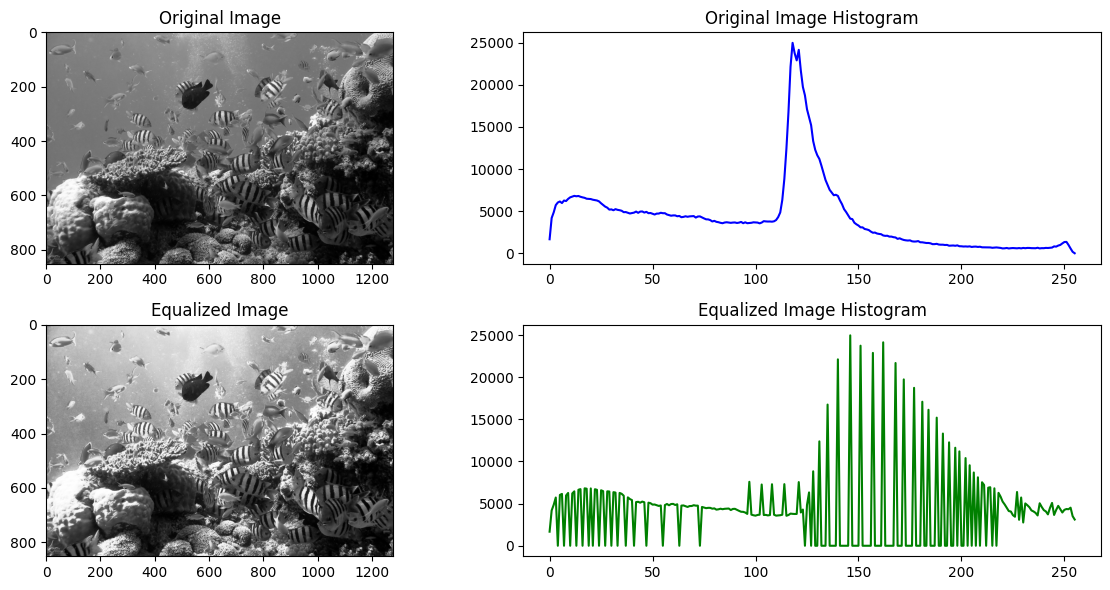

In [ ]:
# get the original histogram of flattened image in a single list 
# compute histogram from numpy 
hist, bins = np.histogram(image_greyscale.flatten(), 256, [0, 255])

# perfomr histogram equalization
equalized_image = cv.equalizeHist(image_greyscale)

equalized_hist, equalized_bins = np.histogram(equalized_image.flatten(), 256, [0, 255])

# Plot the results of equalization 
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image_greyscale, cmap='grey')

plt.subplot(2, 2, 2)
plt.title("Original Image Histogram")
plt.plot(hist, color='blue')

plt.subplot(2, 2, 3)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='grey')

plt.subplot(2, 2, 4)
plt.title("Equalized Image Histogram")
plt.plot(equalized_hist, color='green')

plt.tight_layout()
plt.show()

# In the equalized version, the internsity is more distributed in the image
# the same can be seen in the new equalized histogram where the distribution is broader

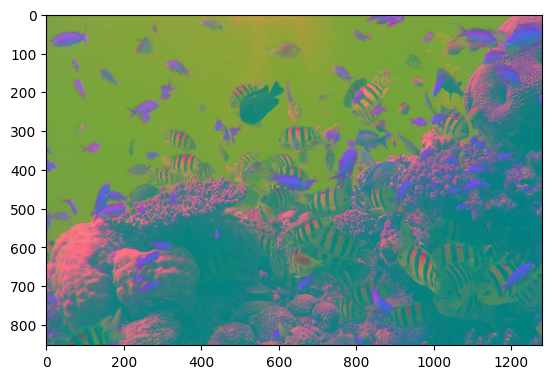

In [13]:
# How to do this in the original RGB image ? 
# RGB has issues If I try to change colors one by one... 
# Instead of using RGB channels we work in 
# LAB domain (L regulate Lightness, AB color)
# YUV domain (Y regulate brightness color, U handles blue components and V contains red component, and G component is implicit computed)
# YUV is highly used in television broadcast 

# by working in YUV, we histogram equalize in Y and than merge it again after conversion
# Hist equalization can be done in one channel 
# (The same can be done in LAB channel)

image_yuv = cv.cvtColor(image, cv.COLOR_BGR2YUV)
plt.imshow(image_yuv)


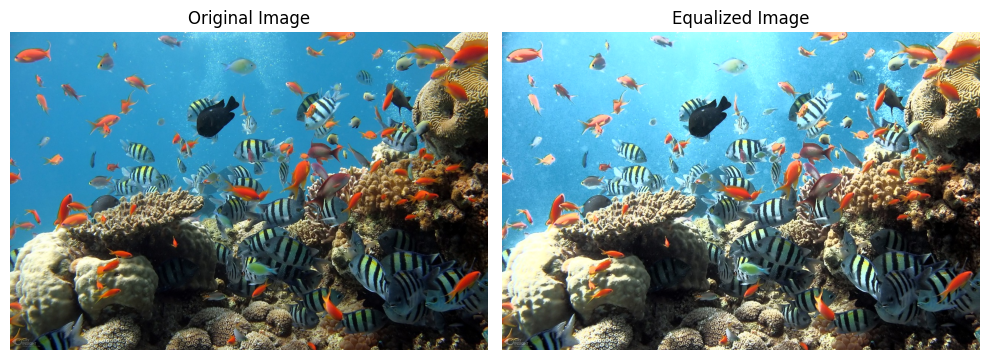

In [ ]:
# using only Y channel for equalization
# Overwrite original image using equalized Y channel as the new one
# Equalizing on the light related channel (Y)
image_yuv[:,:,0] = cv.equalizeHist(image_yuv[:,:,0]) 

# convert back to RGB
image_equalized = cv.cvtColor(image_yuv, cv.COLOR_YUV2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_equalized)
plt.title("Equalized Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# by using equalization it is possible to highlight feature not clear in the original image !
# By applying equalization brightnes is balanced out, often useful to higlgty

# CLAHE


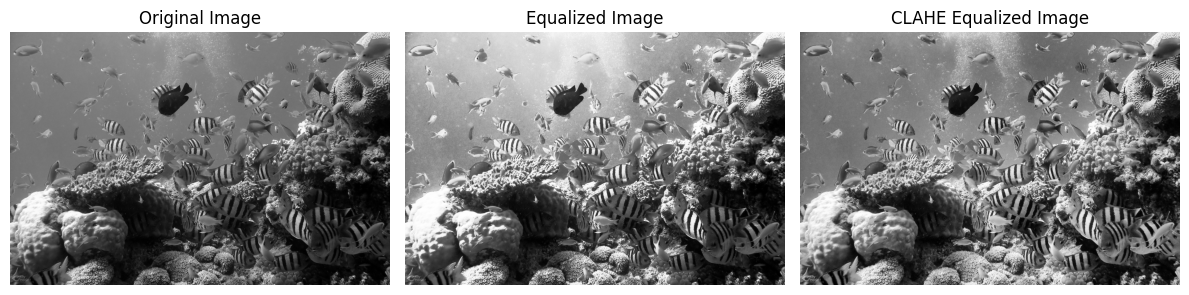

In [ ]:
# Converting Image in grayscale for histogram equalization with CLAHE 

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# use standard histogram equalization to compare with CLAHE
equalized_image = cv.equalizeHist(image_gray)

# use CLAHE class
# first create clahe object 

clahe = cv.createCLAHE(clipLimit=2.0, # The clip limit set threshold fro contrast limiting, increase it to enhance it more aggressively, decrease to prevent over-enhancement
                       tileGridSize= (4,4), # define tile size od the grid, small tiles enhance more but introduce noise, large tiles are smoother but you lose details
                      )

clahe_equalized_image = clahe.apply(image_gray)

# plot side by side 
plt.figure(figsize=(12,8))

plt.subplot(1,3,1)
plt.imshow(image_gray,cmap='grey')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(equalized_image,cmap='grey')
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(clahe_equalized_image,cmap='grey')
plt.title("CLAHE Equalized Image")
plt.axis("off")

plt.tight_layout()
plt.show()

# As can be seen, the CLAHE enhanced image is more detailed without too aggressive noise increase
# While standard equalization is not reliable, CLAHE is more balanced and adaptive in each tile 


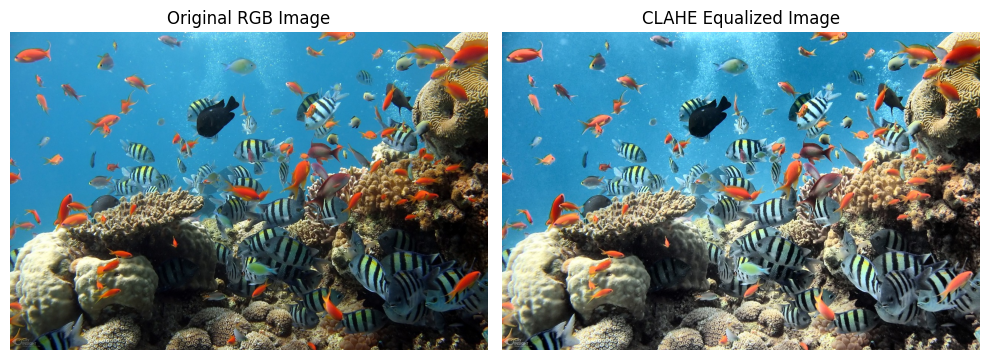

In [ ]:
# How to work in Color space ? 
# As done for standard equalization, we convert to a different color space YUV
image_yuv = cv.cvtColor(image, cv.COLOR_BGR2YUV)

# Apply clahe on the Y channel (Lightness) of the YUV image 
image_yuv[:,:,0] = clahe.apply(image_yuv[:,:,0])
# change only brightness of the original image  (affecting only luminnace (brightness) and not chrominance (color))

# convert back to RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
clahe_image_rgb = cv.cvtColor(image_yuv, cv.COLOR_YUV2RGB)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(clahe_image_rgb)
plt.title("CLAHE Equalized Image")
plt.axis("off")

plt.tight_layout()
plt.show()

# Color looks natural and brighness is more uniform, popping out details from the original image, more pronounced details ! 
# more features are visible and more detailed. Not excessive noise wrt global histigram equalization 